In [170]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [171]:
#importing data
df=pd.read_csv('penguins.csv')

In [172]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Overview of data

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


Descriptive Analytics

In [174]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


Data Cleaning and prerocessing

In [175]:
#checking for null values
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [176]:
#deleting null values
df = df.dropna()
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [177]:
#checking
df.duplicated().sum()

0

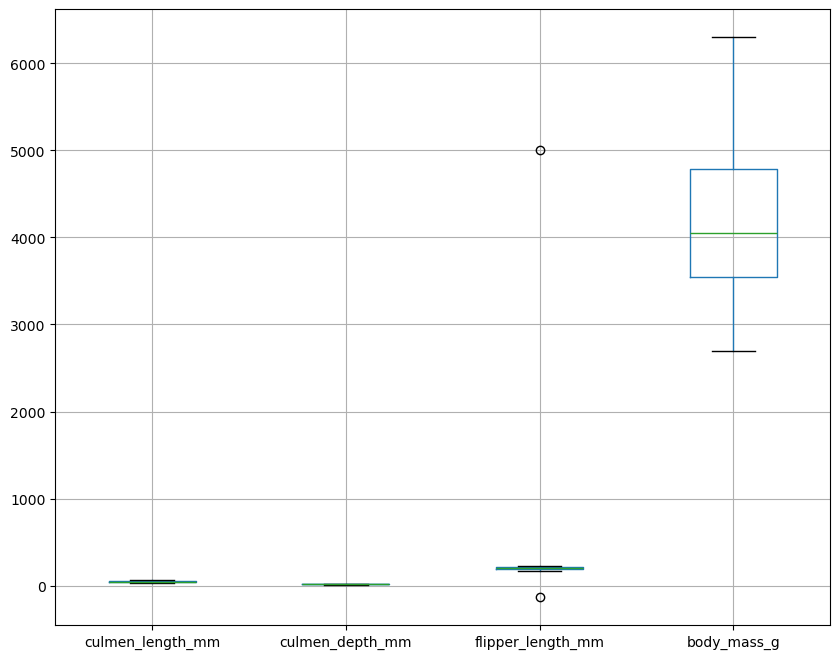

In [178]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.show()

In [179]:
df=df[df['flipper_length_mm']>=0]
df=df[df['flipper_length_mm']<=4000]
df.reset_index(inplace= True)
df

,index,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,MALE
1,1,39.5,17.4,186.0,3800.0,FEMALE
2,2,40.3,18.0,195.0,3250.0,FEMALE
3,4,36.7,19.3,193.0,3450.0,FEMALE
4,5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,338,47.2,13.7,214.0,4925.0,FEMALE
329,340,46.8,14.3,215.0,4850.0,FEMALE
330,341,50.4,15.7,222.0,5750.0,MALE
331,342,45.2,14.8,212.0,5200.0,FEMALE


In [180]:
df= pd.get_dummies(df,drop_first=True)
df.head()

,index,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,0,39.1,18.7,181.0,3750.0,False,True
1,1,39.5,17.4,186.0,3800.0,True,False
2,2,40.3,18.0,195.0,3250.0,True,False
3,4,36.7,19.3,193.0,3450.0,True,False
4,5,39.3,20.6,190.0,3650.0,False,True


In [181]:
sclr=StandardScaler()
scld= sclr.fit_transform(df)
df_scaled= pd.DataFrame(scld,columns=df.columns)
df_scaled

,index,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-1.782207,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-1.771922,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-1.761636,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.741064,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-1.730779,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...,...
328,1.694362,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,1.714933,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.725219,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,1.735505,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


Conducting PCA

In [182]:
pca=PCA()
pc_df=pca.fit(df_scaled)
pc_df.explained_variance_ratio_

array([0.5329075 , 0.32950682, 0.07729041, 0.02848876, 0.01916886,
       0.01180233, 0.00083531])

In [183]:
pca=PCA(n_components=2)
pc_df=pca.fit_transform(df_scaled)

Kmeans

In [184]:
wcss=[]

for i in range(1,10):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(pc_df)
    wcss.append(km.inertia_)


Text(0.5, 1.0, 'Elbow Method Plot')

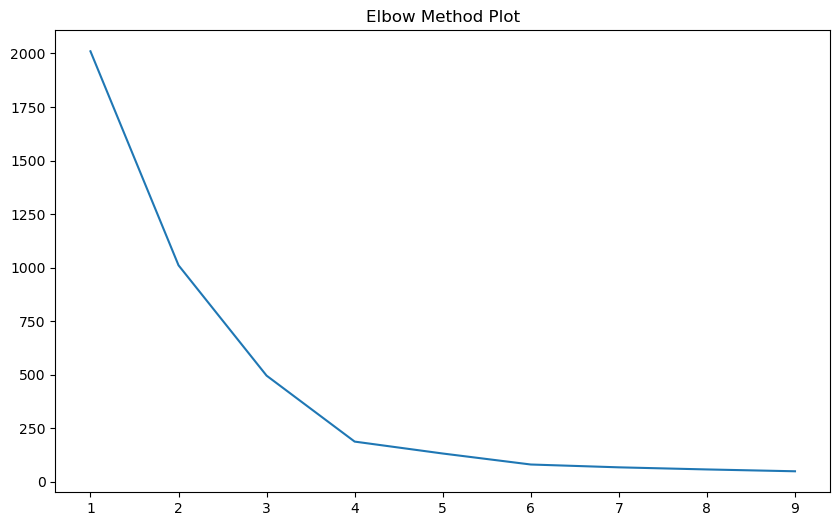

In [185]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss)
plt.title('Elbow Method Plot')

In [186]:
km= KMeans(n_clusters=4,init='k-means++',random_state=42)
km.fit(pc_df)

KMeans(n_clusters=4, random_state=42)

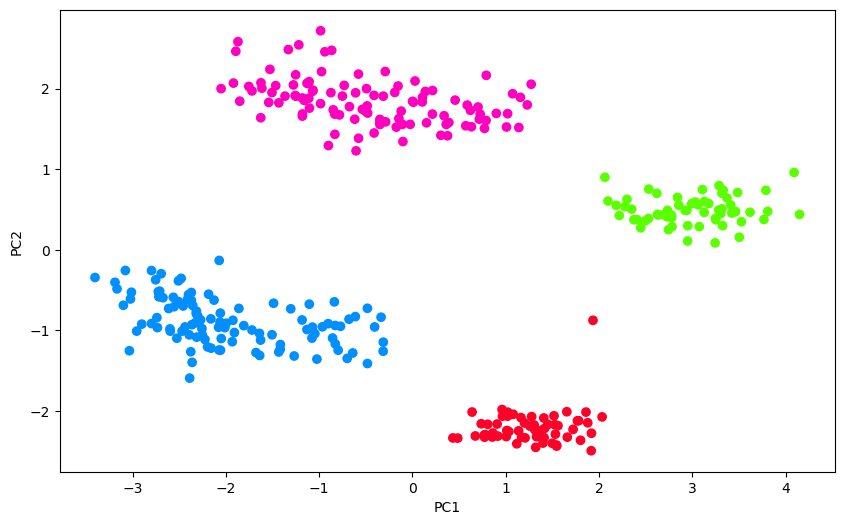

In [187]:
plt.figure(figsize=(10,6))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pc_df[:,0],pc_df[:,1],c=km.labels_ , cmap= 'gist_rainbow_r')
plt.show()
